In [1]:
# Initial Imports 

import pandas as pd
import datetime
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# File Path 

file_path = Path("C:/Users/fizza/Downloads/cad_jpy.csv")
cad_jpy = pd.read_csv(file_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
cad_jpy.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_90 = cad_jpy.loc["1990-01-01":, :]
cad_jpy_90.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


<AxesSubplot:xlabel='Date'>

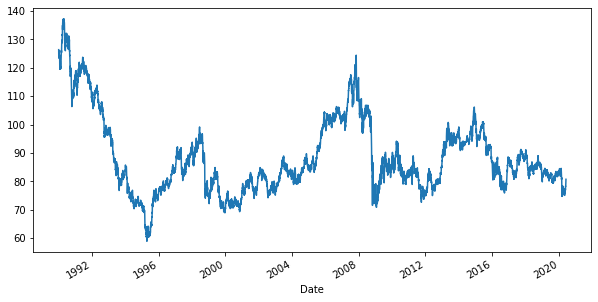

In [4]:
# Plot just the "Price" column from the dataframe:
cad_jpy_90.Price.plot(figsize=(10,5))

In [5]:
#Question: Do you see any patterns, long-term and/or short?
print("Answer: It is possible to see the average value of cad_jpy currency pair around 85, with the pattern being that the JPY getting stronger compared to CAD")

Answer: It is possible to see the average value of cad_jpy currency pair around 85, with the pattern being that the JPY getting stronger compared to CAD


In [6]:
import statsmodels.api as sm
# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
cad_jpy_noise, cad_jpy_trend = sm.tsa.filters.hpfilter(cad_jpy_90["Price"])
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
cad_jpy_HP = pd.DataFrame()
# Fetch data
cad_jpy_HP["Price"] = cad_jpy_90["Price"]
cad_jpy_HP["noise"] = cad_jpy_noise
cad_jpy_HP["trend"] = cad_jpy_trend
cad_jpy_HP.head()

,Price,noise,trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


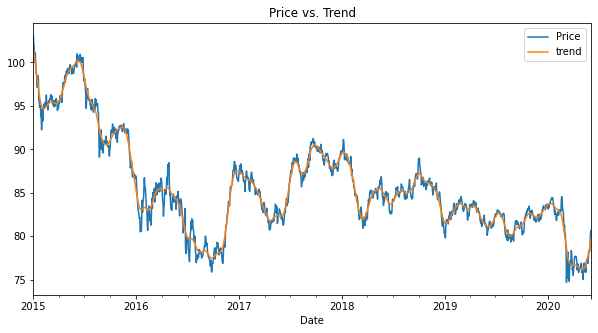

In [7]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
cad_jpy_PvsT = cad_jpy_HP.loc["2015-01-01" :, :]
cad_jpy_PvsT = cad_jpy_PvsT.drop(columns=["noise"])
cad_jpy_PvsT.plot(figsize=(10,5),title='Price vs. Trend').get_figure().savefig('Price vs. Trend.png')

In [8]:
#Question: Do you see any patterns, long-term and/or short? 
print("Answer: The pattern is that the JPY is getting stronger compared to CAD")

Answer: The pattern is that the JPY is getting stronger compared to CAD


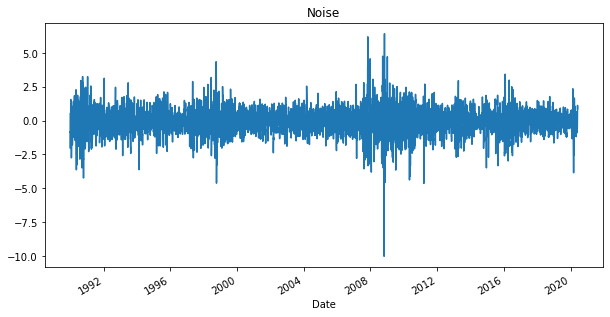

In [9]:
 # Plot the Settle Noise
cad_jpy_noise.plot(figsize=(10,5), title='Noise').get_figure().savefig('noise.png')

ARMA MODEL ASSUMING THIRD VARIABLE AS 1. (NEW CHANGE) 

In [10]:
# Forecasting Returns using an ARMA Model
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
import numpy as np
returns = (cad_jpy_90[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [11]:
import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))

# mod = sm.tsa.arima.ARIMA(returns, order=(2, 1, 1))
model_arma = sm.tsa.arima.ARIMA(returns, order=(2, 1,1))


# Fit the model and assign it to a variable called results
results_arma = model_arma.fit()


C:\Users\fizza\anaconda3\envs\dev1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fizza\anaconda3\envs\dev1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\fizza\anaconda3\envs\dev1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
# Output model summary results:
results_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7928
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -9756.111
Date:                Sun, 31 Jul 2022   AIC                          19520.222
Time:                        17:02:07   BIC                          19548.134
Sample:                             0   HQIC                         19529.780
                               - 7928                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0303      0.007     -4.441      0.000      -0.044      -0.017
ar.L2         -0.0020      0.006     -0.304      0.761      -0.015       0.011
ma.L1         -0.9999      0.002   -452.409      0.000      -1.004      -0.996
sigma2         0.6856      0.006    114.628      0.000       0.674       0.697
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11627.23
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
results_arma.forecast(steps=5)

C:\Users\fizza\anaconda3\envs\dev1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


7928   -0.003264
7929   -0.002087
7930   -0.002092
7931   -0.002094
7932   -0.002094
Name: predicted_mean, dtype: float64

In [14]:
df = pd.DataFrame(results_arma.forecast(steps=5))

C:\Users\fizza\anaconda3\envs\dev1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [15]:
df

,predicted_mean
7928,-0.003264
7929,-0.002087
7930,-0.002092
7931,-0.002094
7932,-0.002094


<AxesSubplot:>

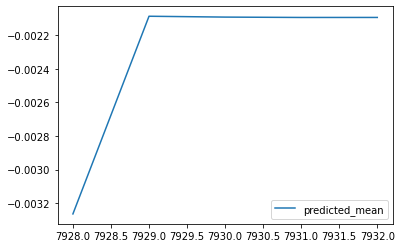

In [16]:
df.plot()
# pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Return Forecast")

 Forecasting the Exchange Rate Price using an ARIMA Model

In [17]:
# Defining a second data frame for ARIMA 
df2 = pd.DataFrame(cad_jpy)

In [18]:
df2

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64
...,...,...,...,...
2020-05-29,78.29,78.21,78.41,77.75
2020-06-01,79.27,78.21,79.36,78.04
2020-06-02,80.40,79.26,80.56,79.15


In [19]:
# Running ARIMA MODEL (Updated Way)
import statsmodels.api as sm
arima_model = sm.tsa.arima.ARIMA(df2["Open"].values, order=(5, 1, 1))
result2 = arima_model.fit()

In [20]:
# Print the model summary
result2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9966
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -11817.866
Date:                Sun, 31 Jul 2022   AIC                          23649.731
Time:                        17:02:09   BIC                          23700.179
Sample:                             0   HQIC                         23666.810
                               - 9966                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0087     10.838     -0.001      0.999     -21.250      21.233
ar.L2          0.0125      0.188      0.067      0.947      -0.355       0.380
ar.L3          0.0080      0.134      0.060      0.953      -0.255       0.271
ar.L4          0.0218      0.088      0.247      0.805      -0.151       0.194
ar.L5         -0.0008      0.237     -0.003      0.997      -0.465       0.464
ma.L1         -0.0086     10.838     -0.001      0.999     -21.250      21.233
sigma2         0.6275      0.004    147.947      0.000       0.619       0.636
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20242.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'5 Days Future Forecast'}>

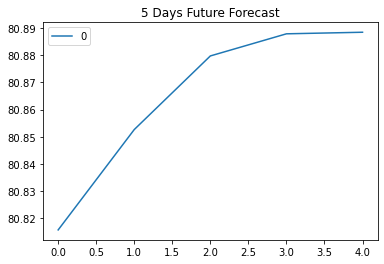

In [21]:
# Plot 5 days Price Forecast
pd.DataFrame(result2.forecast(steps=5)).plot(title="5 Days Future Forecast")

In [22]:
result2.forecast(steps=5)

array([80.81580009, 80.85267224, 80.87971755, 80.88784477, 80.88842244])

Volatility Forecasting with GARCH


In [30]:
from arch import arch_model
import arch as arch

In [33]:
model_arch = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)
res = model_arch.fit(disp="off")

In [35]:
# Summarize the model results
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Sun, Jul 31 2022   Df Residuals:                     7928
Time:                        17:25:12   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [37]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [39]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = res.forecast(start='2020-06-04', horizon=forecast_horizon)
forecasts

In [41]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [43]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


<AxesSubplot:>

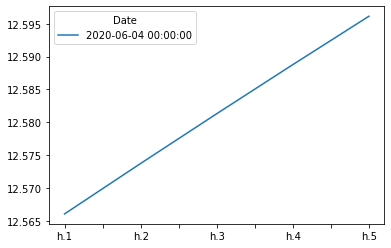

In [45]:
# Plot the final forecast
final.plot()

In [ ]:
# Answers and conclusions will discuss in class as data has changed with new method. 